# Explore here

**1) Data Collection**

In [193]:
# Your code here
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

In [194]:
!pip install tableone
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from tableone import TableOne
from scipy import stats

df = pd.read_csv(url)
df.head() #shows the first 5 rows of the dataframe

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [195]:
df['host_id'].value_counts() #shows the number of listings per host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
274040642      1
274035866      1
24680832       1
71142174       1
274025920      1
Name: count, Length: 37457, dtype: int64

**2) Exploration and Data Cleaning**

In [196]:
# show the dataframe dimensions
df.shape

(48895, 16)

In [197]:
# information about data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [198]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f"{col} has {null_count} null values")

name has 16 null values
host_name has 21 null values
last_review has 10052 null values
reviews_per_month has 10052 null values


In [199]:
df.index[48852] #shows the first row of the dataframe

48852

In [200]:
# change last review column data type to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

**Eliminate Duplicates**

In [201]:
df.duplicated('id').sum() #show the number of duplicated id values

np.int64(0)

In [202]:
df.duplicated().sum() #show the number of duplicated rows

np.int64(0)

No duplicates found

**Eliminate Irrelevant Information**

In [203]:
df.drop(['id', 'name', 'host_name'], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [204]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.373221,7.143982,112.781327
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289


In [205]:
df[df['price'] == 0] #shows the rows with price equal to 0

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


**3) Analysis of Univariate Variables**

**Analysis of Categorical Variables**

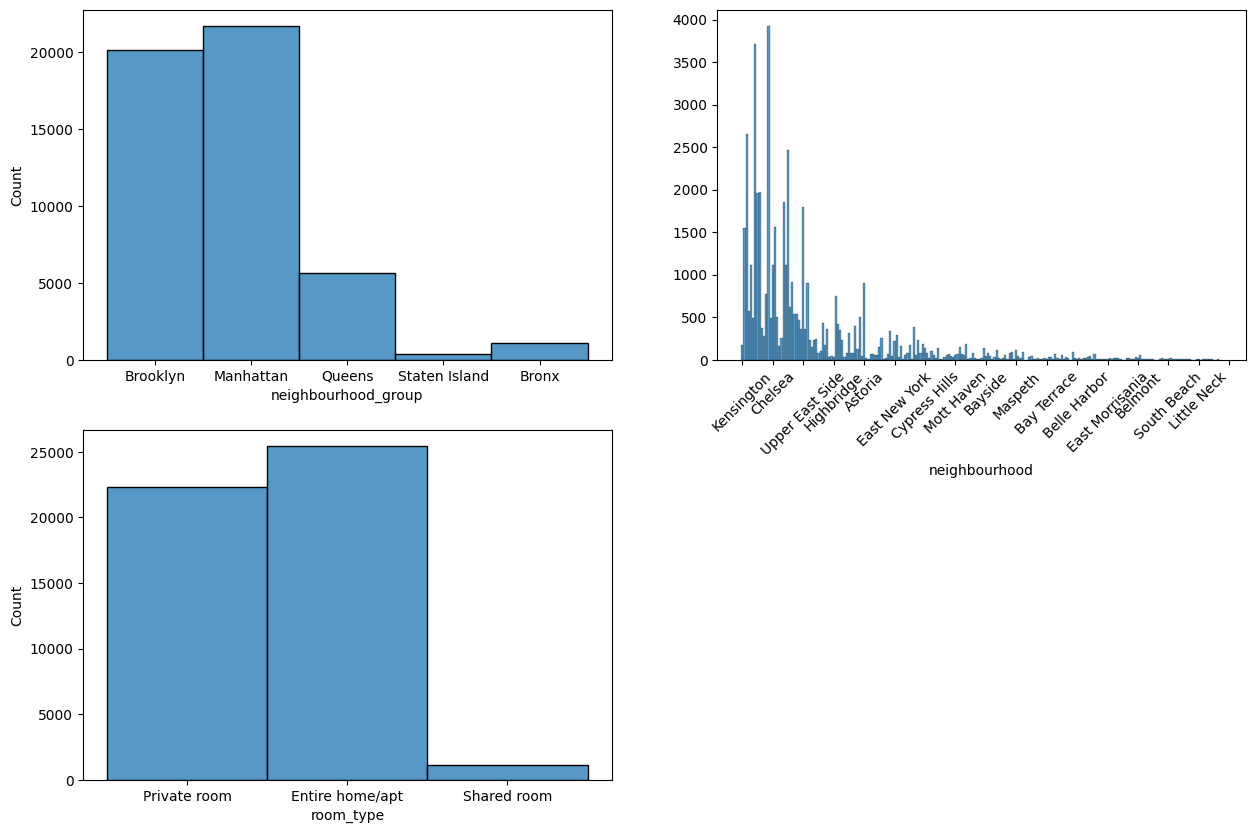

In [206]:
fig, axis = plt.subplots(2, 2, figsize = (15,10))

#create multiple histograms
sns.histplot(ax = axis[0,0], data=df, x='neighbourhood_group')
sns.histplot(ax = axis[0,1], data=df, x='neighbourhood').set(ylabel=None)
sns.histplot(ax = axis[1,0], data=df, x='room_type')

#adjust xticks labels to avoid clumping 
axis[0,1].tick_params(axis='x', rotation=45)
axis[0,1].xaxis.set_major_locator(ticker.MultipleLocator(14))

#adjust layout
#plt.tight_layout()
fig.delaxes(axis[1][1])

#show plot
plt.show()

-  **Neighbourhood Groups:** There is a high concentration of listings in the neighbourhood groups of Brooklyn and Manhattan, with roughly 20,000 properties on each, which represents around 80% of the total listings in the data. 

-  **Neighbourhoods:** Most neighbourhoods seem to have less than a hundred listings. The following most populated cluster seems to be lay between 100 and 1000 listings, while only a few exceptions making it over the 1000 listings. There is a large number of neighbourhoods in the database, which makes it hard to visualize all of the im the same univariate chart to make further conclusions.

-  **Room type:** Almost the entire dataset contains only Private Room and Entire Home/Apt in an approximately equal proportion. Only a few listings have shared rooms.

**Analysis of Numeric Variables:**

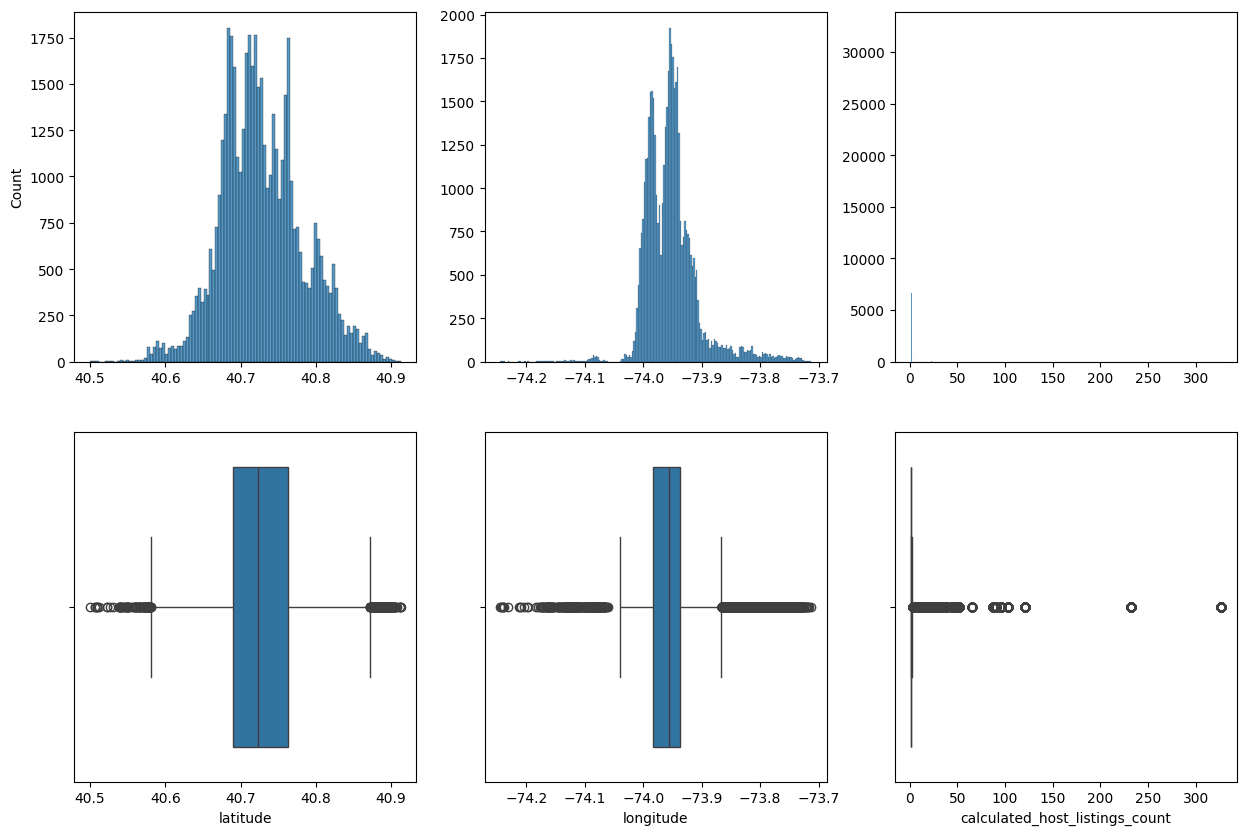

In [207]:
fig, axis = plt.subplots(2, 3, figsize = (15,10))

#plot first set of histograms with box plots: latitude, longitude and calculated_host_listings_count
sns.histplot(ax = axis[0,0], data=df, x='latitude').set(xlabel=None)
sns.histplot(ax = axis[0,1], data=df, x='longitude').set(xlabel=None, ylabel=None)
sns.histplot(ax = axis[0,2], data=df, x='calculated_host_listings_count').set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1,0], data=df, x='latitude')
sns.boxplot(ax = axis[1,1], data=df, x='longitude').set(ylabel=None)
sns.boxplot(ax = axis[1,2], data=df, x='calculated_host_listings_count').set(ylabel=None)

#adjust layout
#plt.tight_layout()

#show plot
plt.show()

**-  Latitude and Longitude:** Both variables seem to show a roughly normal distribution, with no sharp noticeable skewness in their distribution.

**-  Calculated Host Listings Count:** With the exception of the outliers, almost all hosts own one of the listed properties in the database.

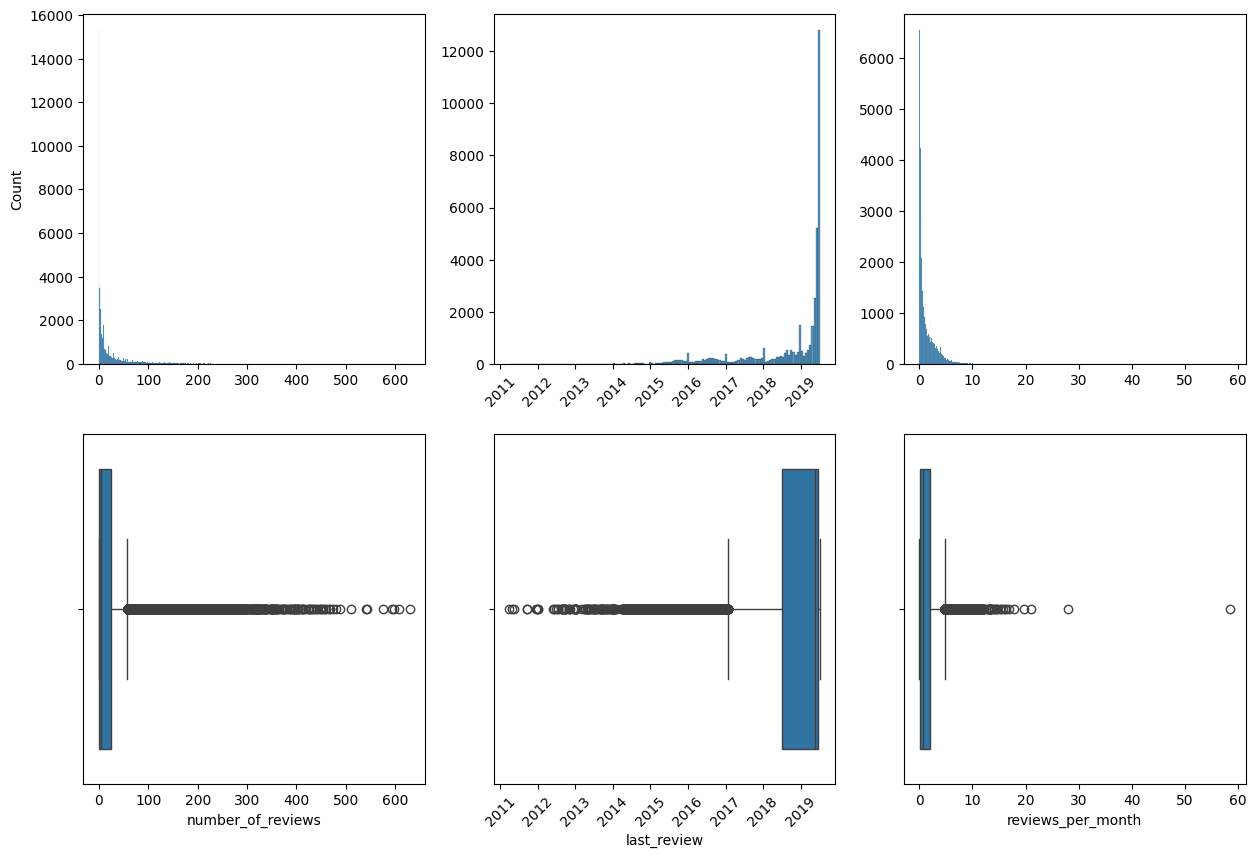

In [208]:
fig, axis = plt.subplots(2,3, figsize = (15,10))

#plot second set of histograms with box plots: number of reviews, last review, and reviews per month
sns.histplot(ax = axis[0,0], data=df, x='number_of_reviews').set(xlabel=None)
sns.histplot(ax = axis[0,1], data=df, x='last_review').set(xlabel=None, ylabel=None)
sns.histplot(ax = axis[0,2], data=df, x='reviews_per_month').set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1,0], data=df, x='number_of_reviews')
sns.boxplot(ax = axis[1,1], data=df, x='last_review').set(ylabel=None)
sns.boxplot(ax = axis[1,2], data=df, x='reviews_per_month').set(ylabel=None)

#adjust layout
axis[0,1].tick_params(axis='x', rotation=45)
axis[1,1].tick_params(axis='x', rotation=45)
#plt.tight_layout()

#show plot
plt.show()

-  **Number of Reviews:** A clear majority of properties have less than 70 reviews in total, with a high concentration between 0 and under 30. The properties over roughly 80 reviews are considered outliers, with some of them even reaching around 600 reviews.

-  **Last Review:** Most of the last reviews took place in 2019. There's an approximately even distribution in the properties of their last review dates between 2015 and 2017, with a small increase in 2018. Years prior to 2015 only contribute with outlying dates. Another identifiable trend is that every year shows a spike in last review registered in the final month of each period.

-  **Reviews per Month:** Most properties show a number of monthly reviews and 5. Outliers start over roughly 8 reviews pero month. Shows a similar distribution and skewness as Number of Reviews. 

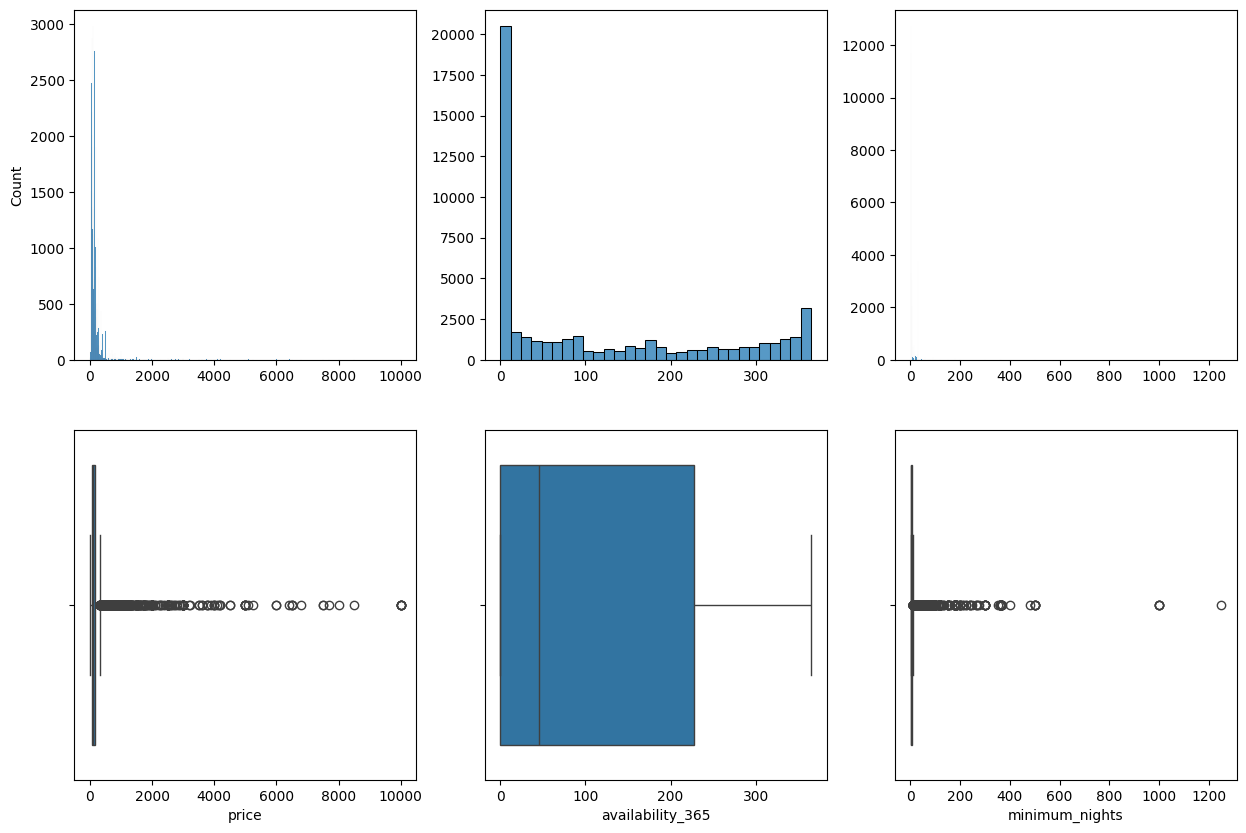

In [209]:
fig, axis = plt.subplots(2,3, figsize = (15,10))

#plot second set of histograms with box plots: number of reviews, last review, and reviews per month
sns.histplot(ax = axis[0,0], data=df, x='price').set(xlabel=None)
sns.histplot(ax = axis[0,1], data=df, x='availability_365').set(xlabel=None, ylabel=None)
sns.histplot(ax = axis[0,2], data=df, x='minimum_nights').set(xlabel=None, ylabel=None)
sns.boxplot(ax = axis[1,0], data=df, x='price')
sns.boxplot(ax = axis[1,1], data=df, x='availability_365').set(ylabel=None)
sns.boxplot(ax = axis[1,2], data=df, x='minimum_nights').set(ylabel=None)

#show plot
plt.show()

**-  Price:** A large majority of the properties are listed below 500 USD per night, with roughly all the rest of the other properties above that price as outliers. Distribution has a strong positive skewness.

**-  Availability 365:** Around half of the properties listed are available under 50 days. A quarter of the properties is available between a broader range of 50 and 230 days throughout the year, whith a final smaller portion reaching up to 350. Distribution also shows a strong positive skewness.

**-  Minimum Nights:** Almost all properties sseem to have a minimum of one night for rental. Distribution has a sharp positive skewness. Roughly all properties with minimum nights over 20 are outliers in the distribution.

**4) Analysis of Multivariate Variables**

**Numerical - Numerical Analysis**

***Price - (Last Review, Reviews per Month)***

Evaluate potential impact of null values in the dataset.

In [210]:
# convert date values of last review to number of days since last review
ref_date = df['last_review'].max()
df['last_review'] = (ref_date - df['last_review']).dt.days
df.rename(columns={'last_review': 'days_since_last_review'}, inplace=True)


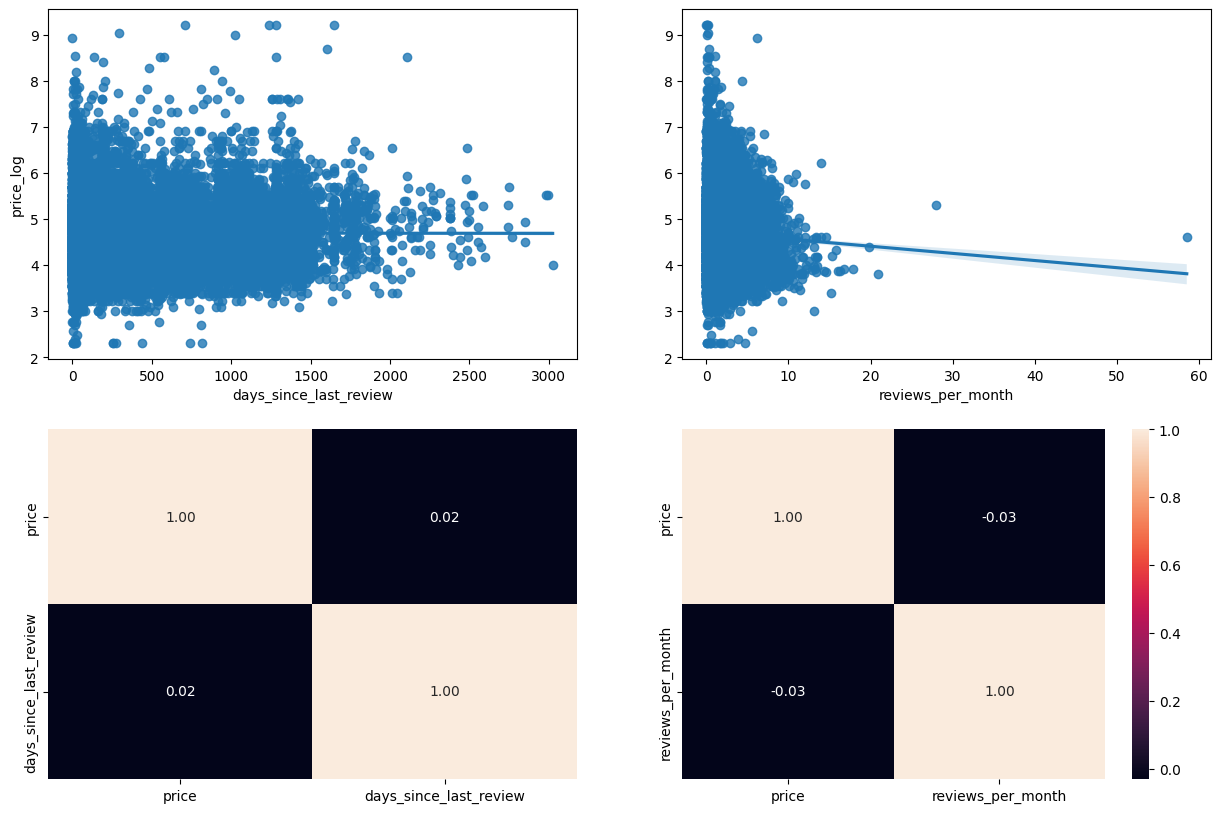

In [211]:
fig, axis = plt.subplots(2,2, figsize = (15,10))

#subset the dataframe to remove rows with price equal to 0 and enable log conversion 
df = df[df['price'] >0]

#create a multiple scatter diagram
sns.regplot(ax = axis[0,0], data=df, x='days_since_last_review', y=np.log(df['price'])).set(ylabel='price_log')
sns.regplot(ax = axis[0,1], data=df, x='reviews_per_month', y=np.log(df['price'])).set(ylabel=None)
sns.heatmap(df[['price', 'days_since_last_review']].corr(), ax = axis[1,0], annot=True, fmt = ".2f", cbar=False)
sns.heatmap(df[['price', 'reviews_per_month']].corr(), ax = axis[1,1], annot=True, fmt = ".2f")

plt.show()

None of the variables with null values show a strong relationship with price. 

***Last Review - Reviews per Month***

Text(0.5, 1.0, 'Spearman correlation matrix')

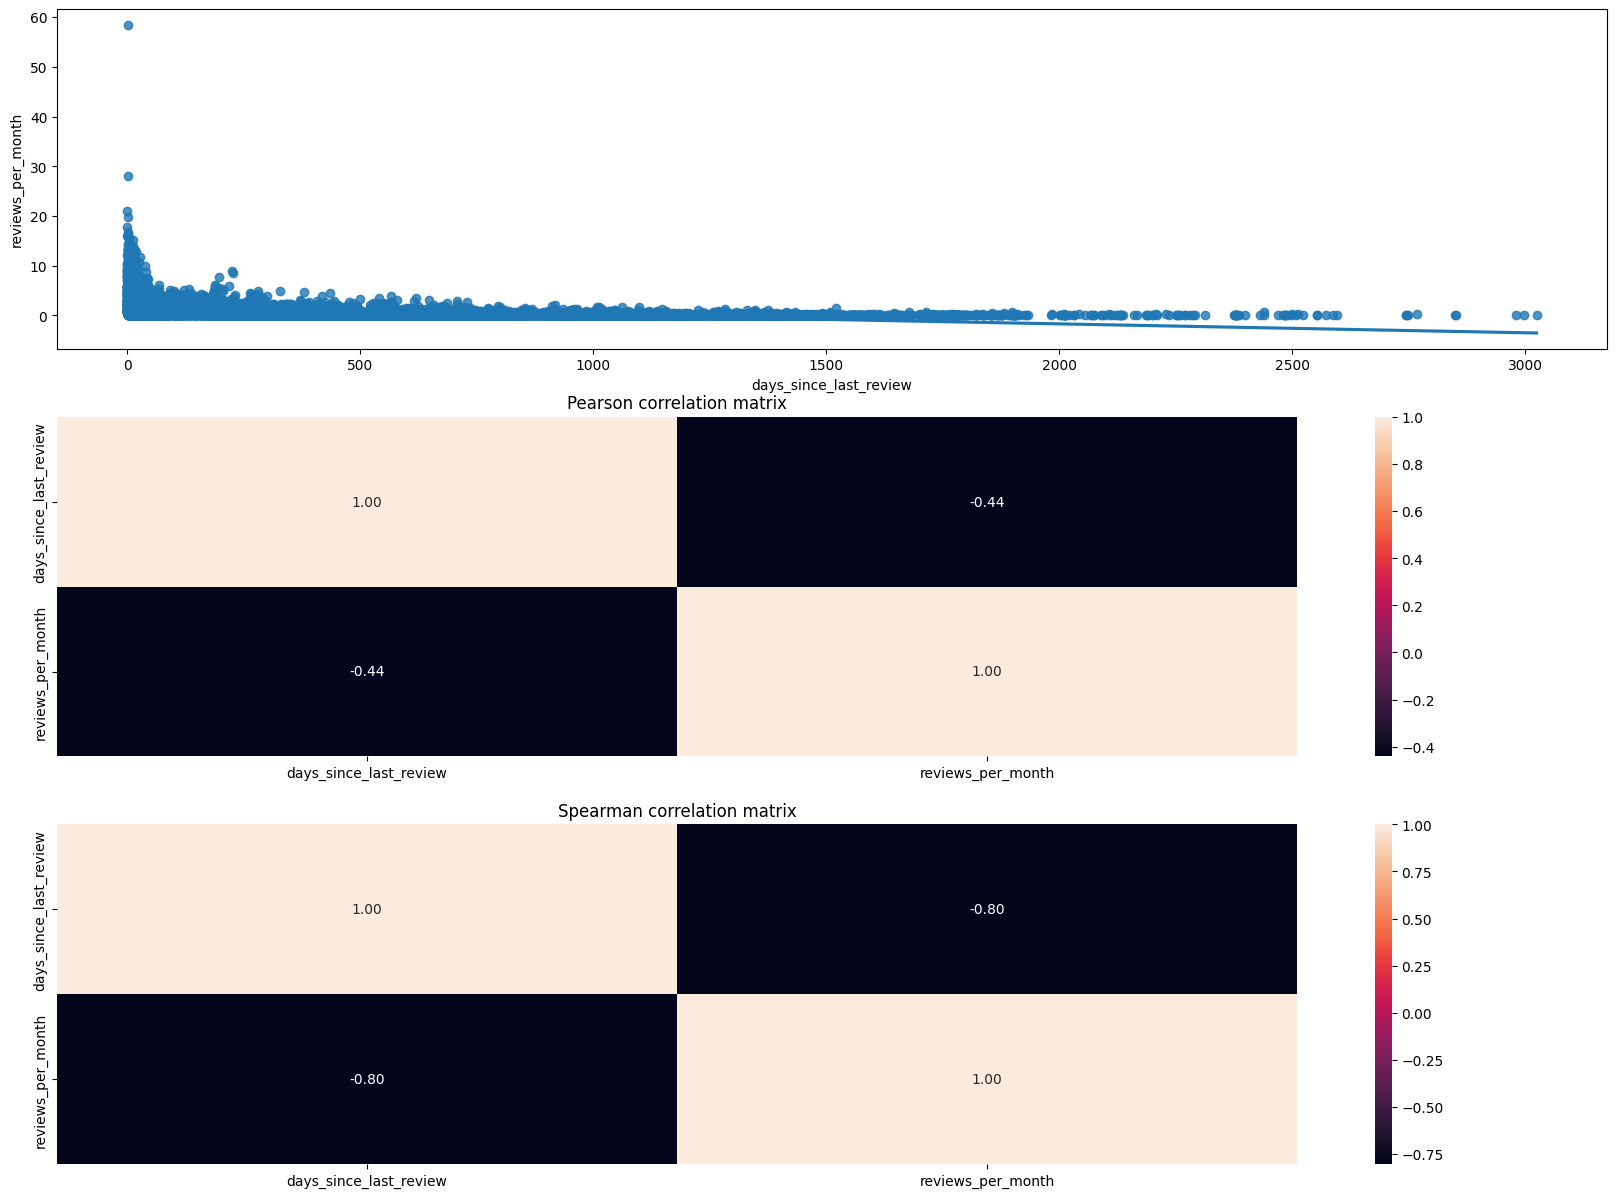

In [212]:
fig, axis = plt.subplots(3, figsize = (20,15))

#create a multiple scatter diagram
sns.regplot(ax = axis[0], data=df, x='days_since_last_review', y='reviews_per_month')
sns.heatmap(df[['days_since_last_review', 'reviews_per_month']].corr(), ax = axis[1], annot=True, fmt = ".2f")
sns.heatmap(df[['days_since_last_review', 'reviews_per_month']].corr(method='spearman'), ax = axis[2], annot=True, fmt = ".2f")

#set chart titles
axis[1].set_title('Pearson correlation matrix')
axis[2].set_title('Spearman correlation matrix')

**Analysis:** There is a moderately negative linear relationship between days since last review and reviews per month as one could expect, since properties with low reviews per month will be less likely to have recent reviews. The negative Spearman correlation confirms the decreasing monotonic trend of this relationship.

***Price - (Latitude, Longitude)***

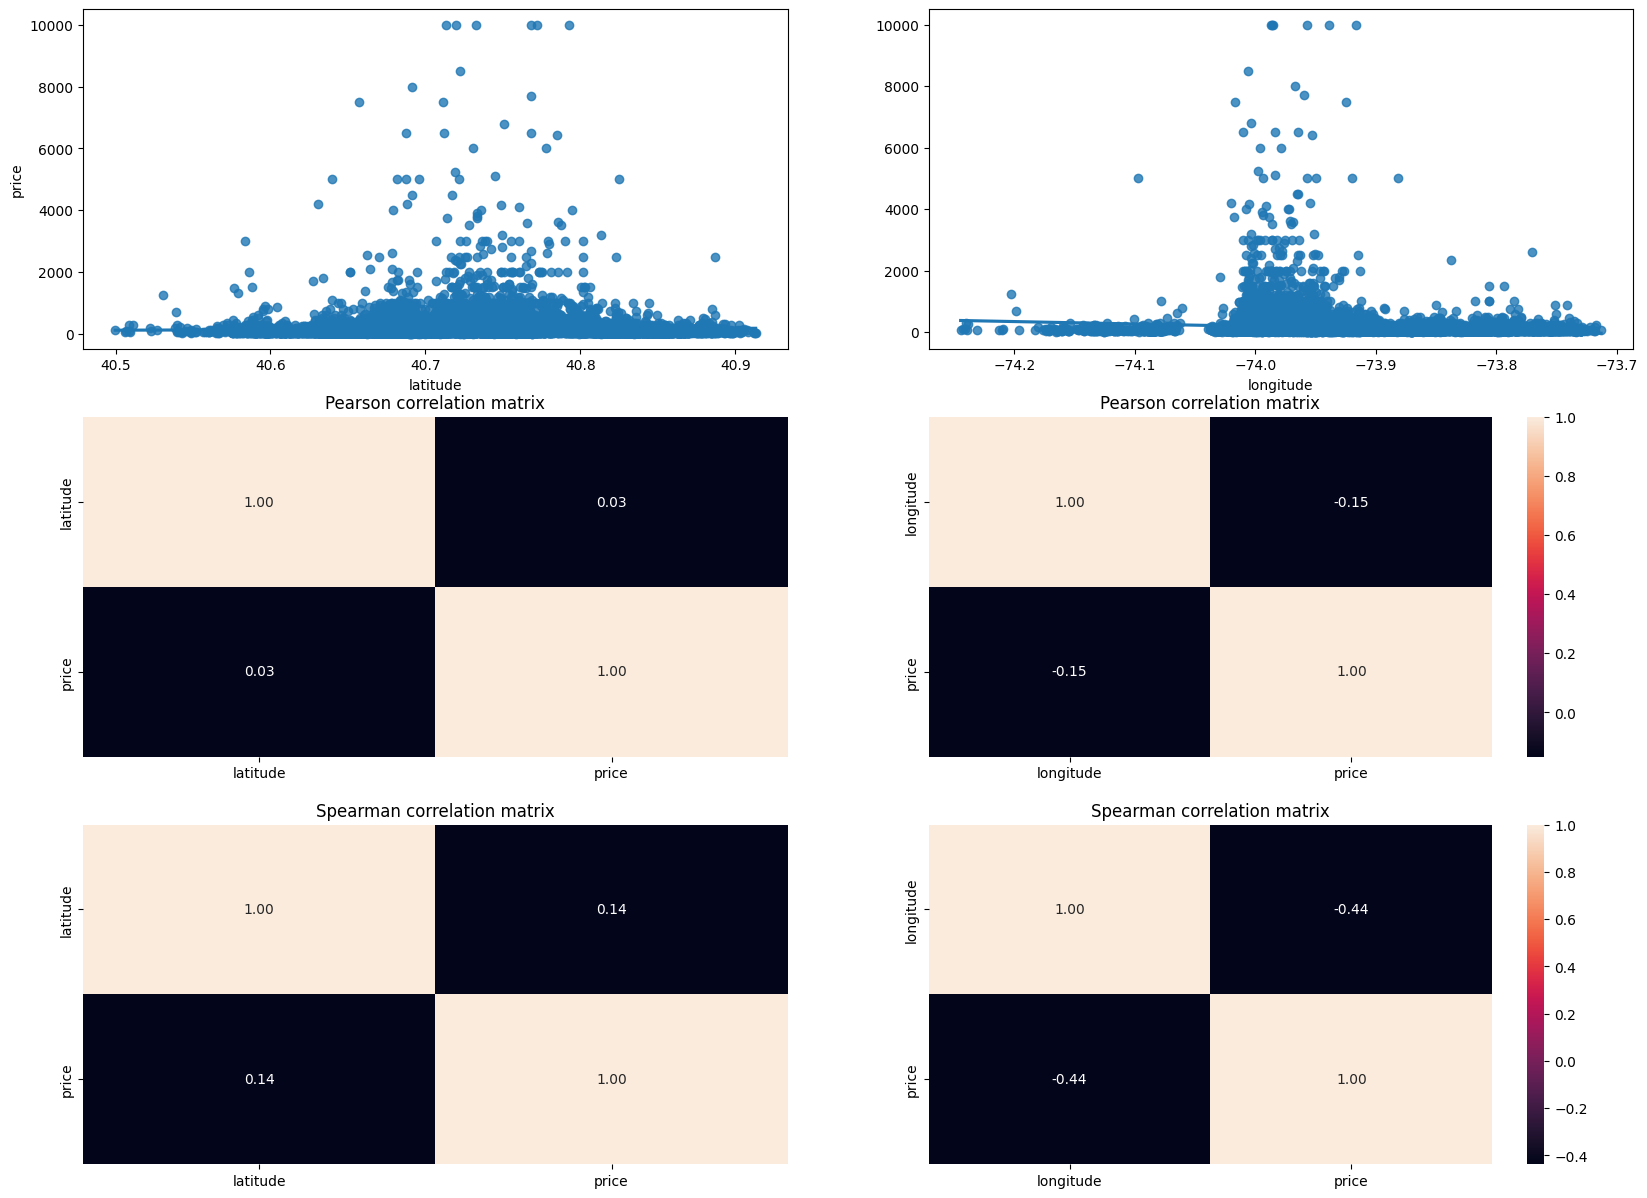

In [213]:
fig, axis = plt.subplots(3,2, figsize = (20,15))

# create regression plots and correlation matrices
sns.regplot(ax = axis[0,0], data=df, x='latitude', y='price')
sns.regplot(ax = axis[0,1], data=df, x='longitude', y='price').set(ylabel=None)
sns.heatmap(df[['latitude', 'price']].corr(), ax = axis[1,0], annot=True, fmt = ".2f", cbar=False)
sns.heatmap(df[['longitude', 'price']].corr(), ax = axis[1,1], annot=True, fmt = ".2f")
sns.heatmap(df[['latitude', 'price']].corr(method='spearman'), ax = axis[2,0], annot=True, fmt = ".2f", cbar=False)
sns.heatmap(df[['longitude', 'price']].corr(method='spearman'), ax = axis[2,1], annot=True, fmt = ".2f")

#set chart titles
axis[1,0].set_title('Pearson correlation matrix')
axis[1,1].set_title('Pearson correlation matrix')
axis[2,0].set_title('Spearman correlation matrix')
axis[2,1].set_title('Spearman correlation matrix')

plt.show()

**Analysis:** Property location variation from North to South doesn't seem to have any direct impact on the price of the listed properties. There seems to be a slightly negative correlation longitude wise, where properties located towards the West (lower longitude) would have higher prices in New York than those located towards the East side of the city, which is supported by a moderately negative monotonic trend.

**Categorical - Categorical Analysis**

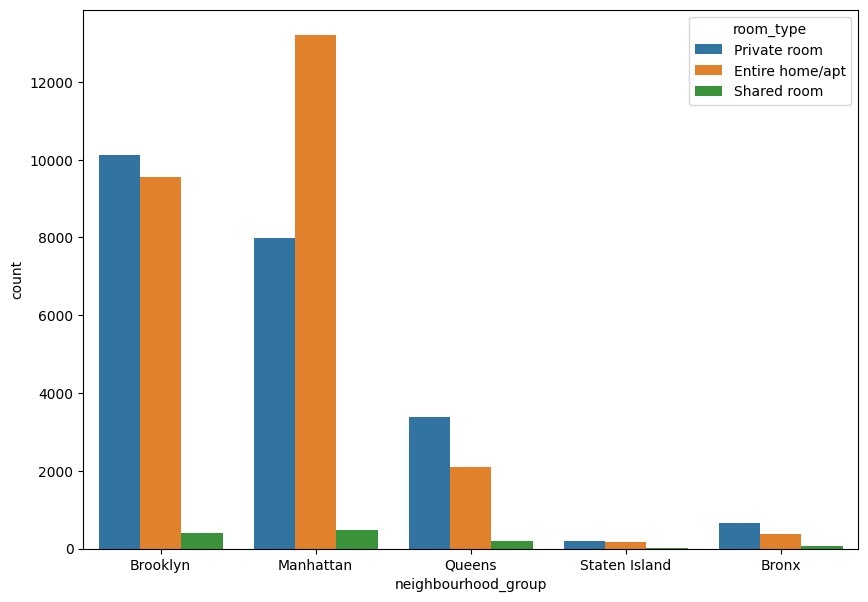

In [214]:
fig, axis = plt.subplots(figsize = (10,7))

#room type count by neighbourhood group
sns.countplot(ax = axis, data=df, x='neighbourhood_group', hue='room_type')

plt.show()

**Analysis:** Brooklyn and Manhattan Neighbourhood groups present the largest share of properties listed. Manhattan shows a much larger proportion of Entire home/apt compared to Private Room, while Brooklyn, Queens, Staten Island and Bronx have a higher proportion of Private Rooms compared to Entire home/apt in their respective Neighbourhood groups. All Neighbourhoods group have a smaller proportion of Shared rooms respect to the total properties listed within them.

**Correlation Analysis**

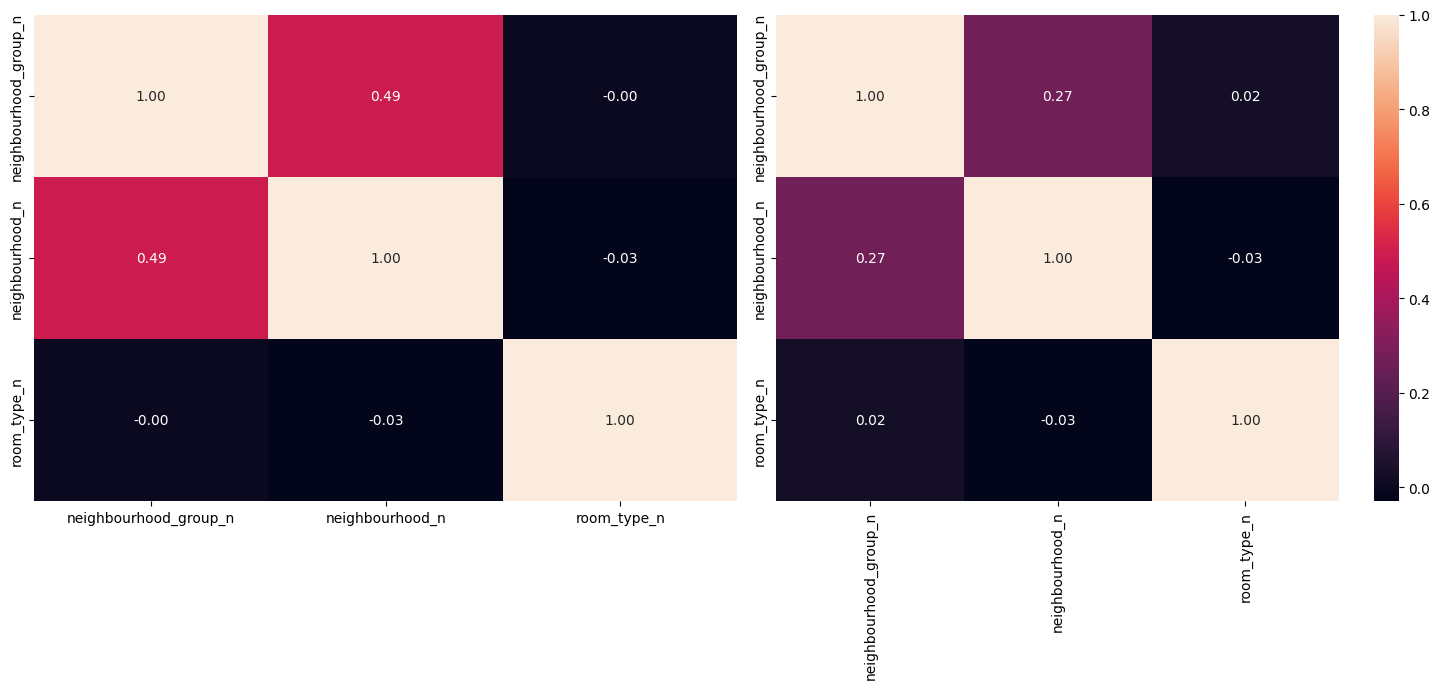

In [215]:
fig, axis = plt.subplots(1,2, figsize = (15,7))

# create columns with factorized values
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]

#create a correlation matrix
sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(), ax= axis [0], annot = True, fmt = ".2f", cbar=False).set_ylabel(None)
sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n"]].corr(method='spearman'), ax= axis [1], annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

**Analysis:** The correlation matrix shows that the neighbourhood group and neighbourhood columns have a strong correlation, which is expected since the neighbourhoods are grouped by neighbourhood group. The room type column has a weak correlation with the neighbourhood group and neighbourhood columns, meaning that the distribution of room types is not affeceted by these variables.

**Numerical - Categorical Analysis**

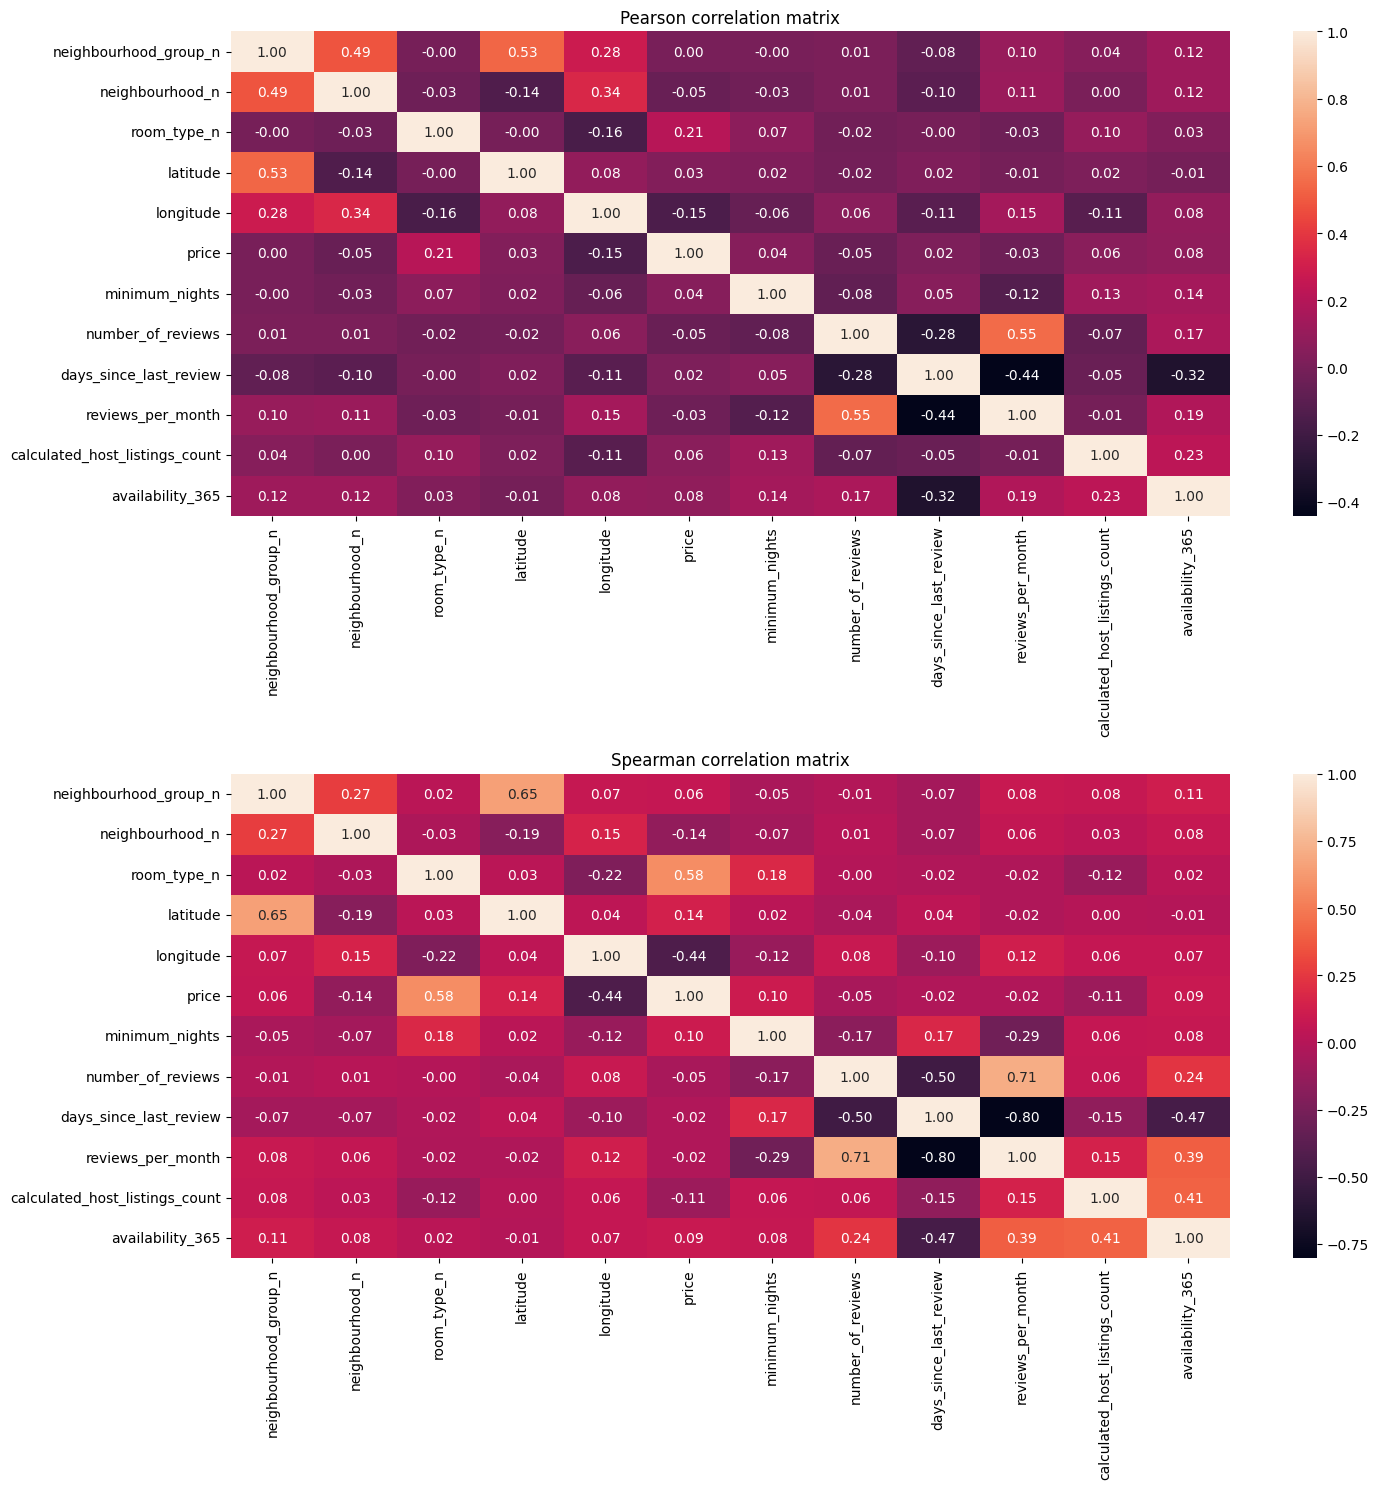

In [216]:
fig, axis = plt.subplots(2,1, figsize = (15,15))

#create a correlation matrix
sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'days_since_last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), ax=axis[0], annot = True, fmt = ".2f").set_title('Pearson correlation matrix')
sns.heatmap(df[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'days_since_last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(method='spearman'), ax=axis[1], annot = True, fmt = ".2f").set_title('Spearman correlation matrix')  

plt.tight_layout()
plt.show()

**Analysis:** 
-  Apart from the already mentioned relationships, new ones are detected between latitude-longitude and neighbourhood-neighbourhood group, which respond to a geographical dimension of the data.

-  As one could expect, reviews per month is also high for those properties with more total reviews since there is a positive relationship. Properties with less days available within a year are also the ones with more days since last review.

-  In regards to price, room type seems to have the most influence in a positive relationship, with a noticeable positive monotonic trend.

<function matplotlib.pyplot.show(close=None, block=None)>

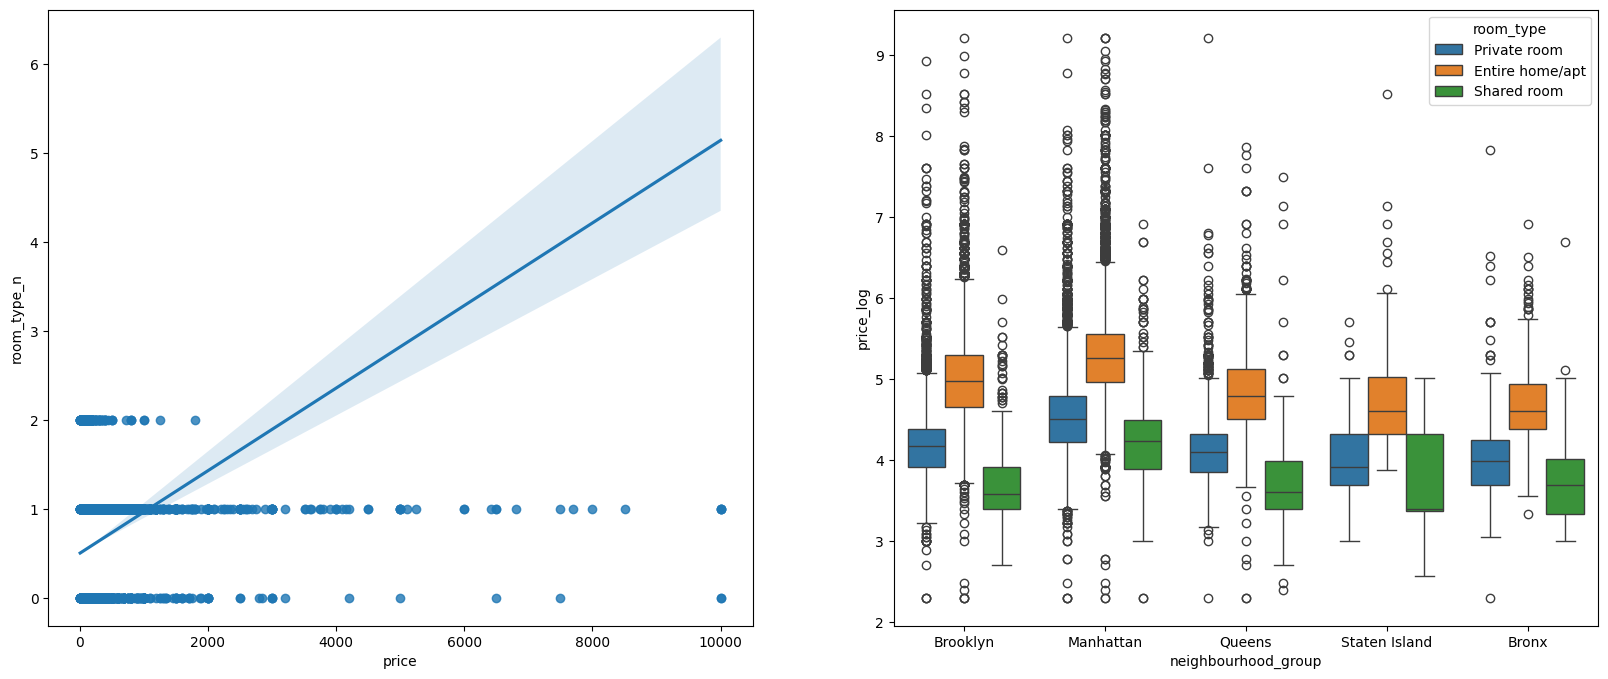

In [217]:
fig, axis = plt.subplots(1, 2, figsize = (20,8))

sns.regplot(ax=axis[0], data=df, x='price', y='room_type_n')
sns.boxplot(ax=axis[1], data=df, x='neighbourhood_group', y=np.log(df['price']), hue='room_type').set(ylabel='price_log')

plt.show

**Analysis:** The charts above shows how at higher prices, the presence of Private Rooms (1) and Entire Home/Apt (0) becomes more prominent, which also supports the correlations seen in the matrices above.

**Table One**

In [218]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'days_since_last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_n', 'neighbourhood_n', 'room_type_n'],
      dtype='object')

In [219]:
#drop unnercessary columns
df.drop(['neighbourhood_group_n', 'neighbourhood_n', 'room_type_n', 'latitude', 'longitude', 'host_id'], axis=1, inplace=True)

In [220]:
# create a column with price categories
df['price_category'] = pd.qcut(df['price'], q=3, labels=['low', 'medium', 'high'])
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,days_since_last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,Brooklyn,Kensington,Private room,149,1,9,262.0,0.21,6,365,medium
1,Manhattan,Midtown,Entire home/apt,225,1,45,48.0,0.38,2,355,high
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,medium
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,3.0,4.64,1,194,medium
4,Manhattan,East Harlem,Entire home/apt,80,10,9,231.0,0.10,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9,low
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36,low
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27,medium
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2,low


In [221]:
# identify boolean columns
def is_bool(df, cols):
  df_ = df.copy()
  bool_vars = []
  for col in cols:
    if (df[col].dtype == int) or (df[col].dtype == float):
      flag = True
      unique_list = df[col].unique()
      for value in unique_list:
        if (value not in [1, 0, 0.0, 1.0]) and (np.isnan(value) == False):
          flag = False
      if flag == True:
        bool_vars.append(col)
  return bool_vars

# identify categorical, boolean, normal and non-normal variables
def breakdown_vars(df):
  categorical_vars = []
  boolean_vars = []
  normal_vars = []
  non_normal_vars = []
  boolean_vars = is_bool(df, df.columns)
  for col in df.columns:
    if (df[col].dtype == 'object' or df[col].dtype == 'category') and col not in boolean_vars:
      categorical_vars.append(col)
    elif (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col not in boolean_vars:
      n, p = stats.shapiro(df[col])
      if p < 0.05:
        non_normal_vars.append(col)
      else:
        normal_vars.append(col)
  return categorical_vars,  boolean_vars, normal_vars, non_normal_vars

In [222]:
categorical_vars, boolean_vars, normal_vars, non_normal_vars =  breakdown_vars(df)

c:\Users\JI\machine-learning-python-template\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48884.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#create table one
my_table = TableOne(df,
                    categorical= categorical_vars,
                    nonnormal = non_normal_vars,
                    groupby = 'neighbourhood_group',
                    pval = True,
                    htest_name=True
                    )
my_table

Grouped by neighbourhood_group                                                                                                                                                                         
                                                                                                 Missing             Overall               Bronx           Brooklyn           Manhattan             Queens       Staten Island P-Value                                       Test
n                                                                                                                      48884                1090              20095               21660               5666                 373                                                   
neighbourhood_group, n (%)                     Bronx                                                              1090 (2.2)        1090 (100.0)                                                                                <0.001  Chi-squared (warning: expected count < 5)
                                               Brooklyn                                                         20095 (41.1)                          20095 (100.0)                                                                                                              
                                               Manhattan                                                        21660 (44.3)                                              21660 (100.0)                                                                                          
                                               Queens                                                            5666 (11.6)                                                                  5666 (100.0)                                                                       
                                               Staten Island                                                       373 (0.8)                                                                                       373 (100.0)                                                   
neighbourhood, n (%)                           Allerton                                                             42 (0.1)            42 (3.9)                                                                                <0.001  Chi-squared (warning: expected count < 5)
                                               Baychester                                                            7 (0.0)             7 (0.6)                                                                                                                                 
                                               Belmont                                                              24 (0.0)            24 (2.2)                                                                                                                                 
                                               Bronxdale                                                            19 (0.0)            19 (1.7)                                                                                                                                 
                                               Castle Hill                                                           9 (0.0)             9 (0.8)                                                                                                                                 
                                               City Island                                                          18 (0.0)            18 (1.7)                                                                                                                                 
                                               Claremont Village                                                    28 (0.1)            28 (2.6)                                                                                              

In [ ]:
#export table one to excel
my_table.to_excel('mytable.xlsx')

**Analysis:** The difference seen in the prices depending on the neighbourhood group can be seen in detail with the Chi Squared test, where the distribution varies significantly depending on the price segment. Manhattan holds a high share of high-end properties compared to the rest, while Bronx, Queens and Staten Island represent a much larger share of the lower-end properties. In the medium range, the neighbourhood groups seem to have a relatively similar distribution.

**APPENDIX**

***Detailed Plot of Neighbourhood by Neighbourhood Gorup and Room Type***

C:\Users\JI\AppData\Local\Temp\ipykernel_70800\2473061217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['neighbourhood_count'] = subset.groupby('neighbourhood')['neighbourhood'].transform(lambda x: x.count())
C:\Users\JI\AppData\Local\Temp\ipykernel_70800\2473061217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['neighbourhood_count'] = subset.groupby('neighbourhood')['neighbourhood'].transform(lambda x: x.count())
C:\Users\JI\AppData\Local\Temp\ipykernel_70800\2473061217.py:7: Sett

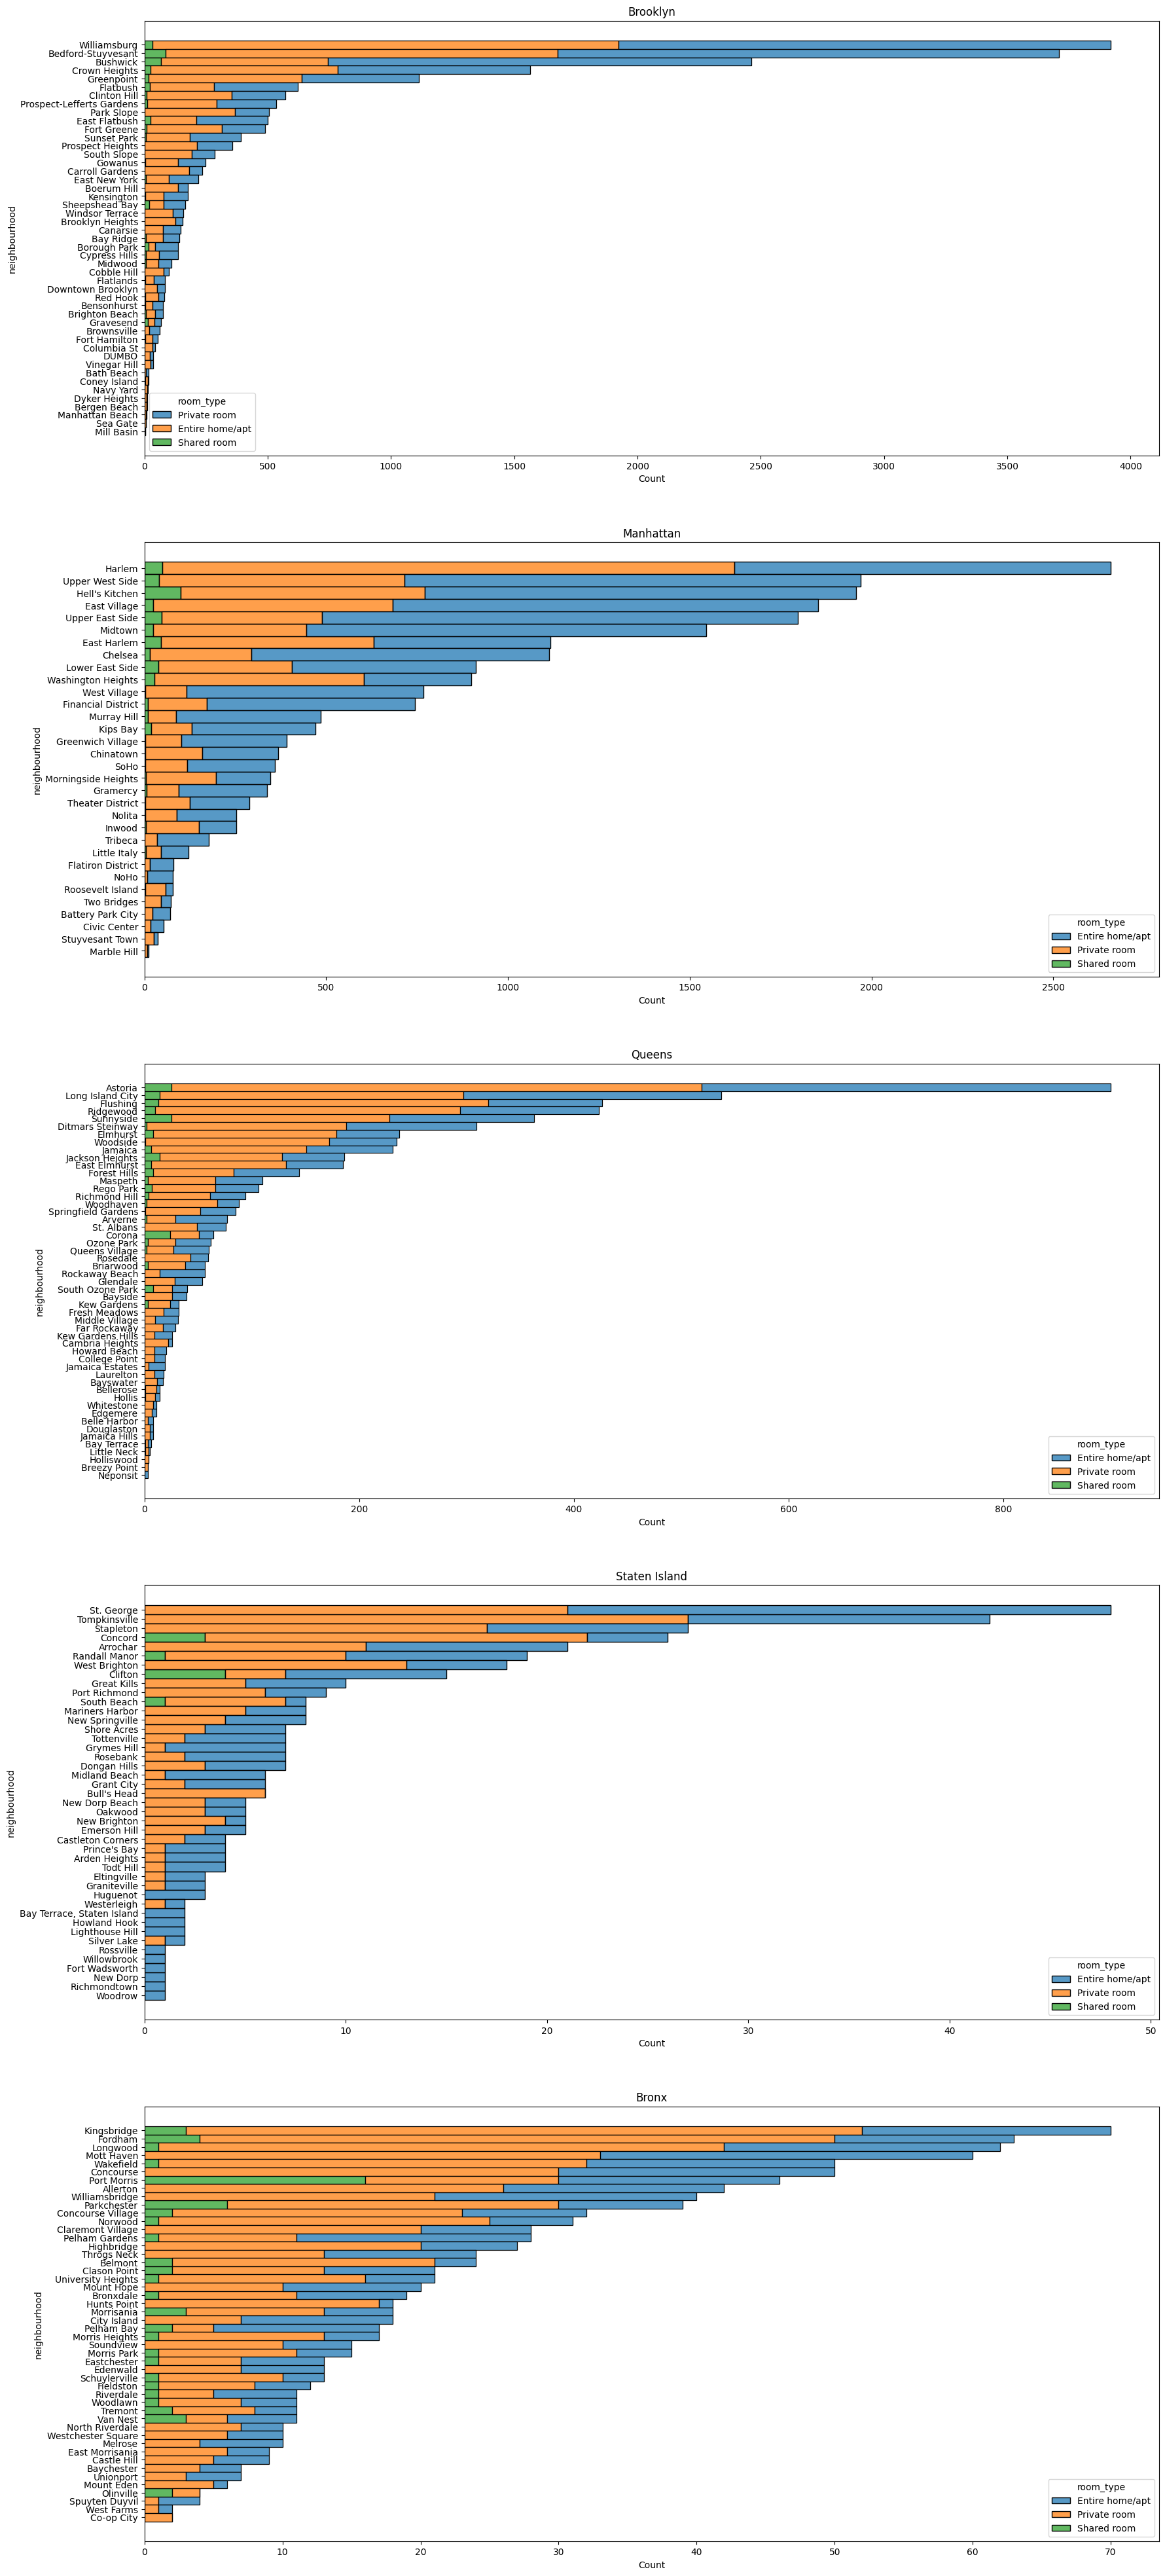

In [149]:
fig, axis = plt.subplots(len(df['neighbourhood_group'].unique()), figsize = (20,50))

i=0

for n in df['neighbourhood_group'].unique():
    subset = df.loc[df['neighbourhood_group'] == n]
    subset['neighbourhood_count'] = subset.groupby('neighbourhood')['neighbourhood'].transform(lambda x: x.count())
    subset = subset[['neighbourhood', 'room_type','neighbourhood_count']]
    subset = subset.sort_values(by='neighbourhood_count', ascending=False)
    sns.histplot(ax = axis[i], data=subset, y='neighbourhood', multiple='stack', hue='room_type').set_title(n)
    i+=1